In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from google.colab import files
import seaborn as sns
uploaded = files.upload()
df = pd.read_excel(list(uploaded.keys())[0])

Saving ML470_S3_HR_Data_Practice.xlsx to ML470_S3_HR_Data_Practice.xlsx


In [ ]:
X = df.drop("left", axis=1)
y = df["left"]

In [ ]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [ ]:
X["Department"] = label_encoder.fit_transform(X["Department"])
X["salary"] = label_encoder.fit_transform(X["salary"])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
model = DecisionTreeClassifier(
    criterion="gini",        # or "entropy"
    max_depth=3,
    min_samples_split=10,
    random_state=42
)

In [ ]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9486666666666667

Confusion Matrix:
 [[3289  139]
 [  92  980]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.97      3428
           1       0.88      0.91      0.89      1072

    accuracy                           0.95      4500
   macro avg       0.92      0.94      0.93      4500
weighted avg       0.95      0.95      0.95      4500



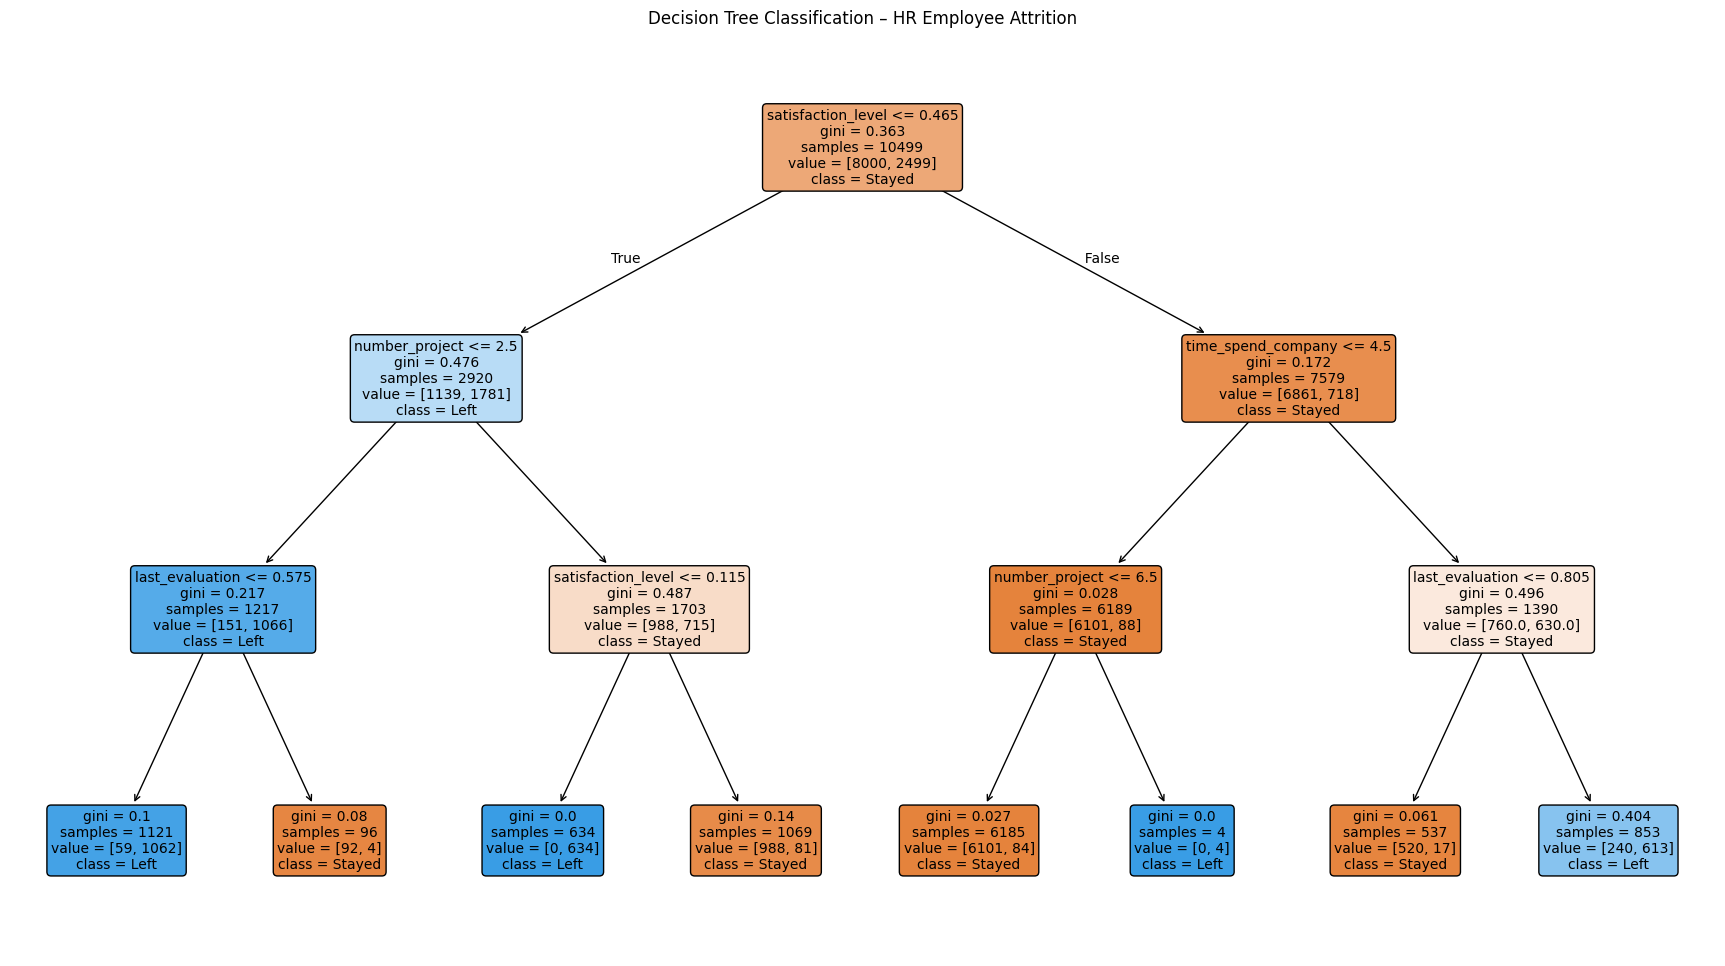

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(22, 12))
plot_tree(
    model,
    feature_names=X.columns,
    class_names=["Stayed", "Left"],
    filled=True,
    rounded=True
)
plt.title("Decision Tree Classification – HR Employee Attrition")
plt.show()